D:\conda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='X0', ylabel='X1'>

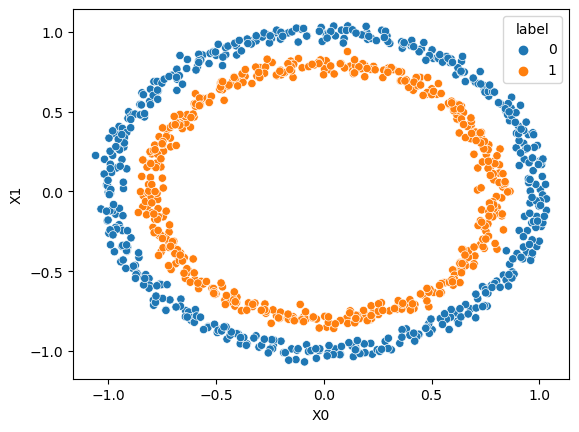

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
sns.scatterplot(data=circles,x="X0",y="X1",hue="label")

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
model = Sequential([
    Dense(16,activation='relu',input_shape=(2,)),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']

)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 2s 5ms/step - loss: 0.6904 - accuracy: 0.5200
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 0.6809 - accuracy: 0.5543
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.6700
Epoch 4/10
22/22 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6743
Epoch 5/10
22/22 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.8000
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 0.5093 - accuracy: 0.8643
Epoch 7/10
22/22 [==============================] - 0s 5ms/step - loss: 0.4031 - accuracy: 0.9514
Epoch 8/10
22/22 [==============================] - 0s 5ms/step - loss: 0.3119 - accuracy: 0.9614
Epoch 9/10
22/22 [==============================] - 0s 4ms/step - loss: 0.2178 - accuracy: 0.9857
Epoch 10/10
22/22 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9957


In [4]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.1511 - accuracy: 0.9967


[0.151116281747818, 0.996666669845581]

NameError: name 'histoy' is not defined

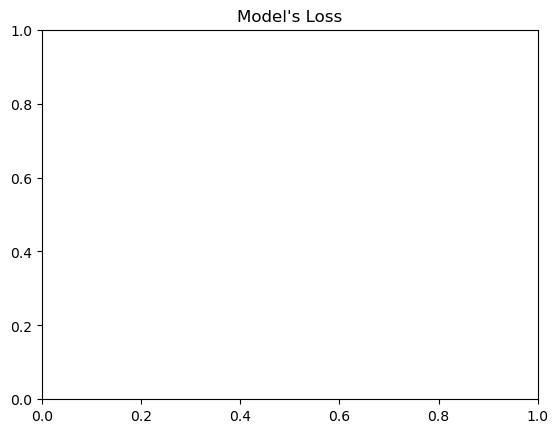

In [5]:
plt.title("Model's Loss")
plt.plot(histoy.history['loss'])
plt.xlabel("No of Epoch")
plt.ylabel("Loss Value")

In [6]:
def plotq(model,X,y):
    x_min,x_max = X[:,0].min()- 0.1,X[:,0].max() + 0.1
    y_min , y_max = X[:,1].min()-0.1 ,X[:,1].max()+0.1

    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))

  
    x_in = np.c_[xx.ravel(),yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0]) > 1:
      print("doing multiclass classification")

      y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
      print("doing binary")
      y_pred = np.round(y_pred).reshape(xx.shape)


    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 2s 4ms/step
doing binary
313/313 [==============================] - 1s 4ms/step
doing binary


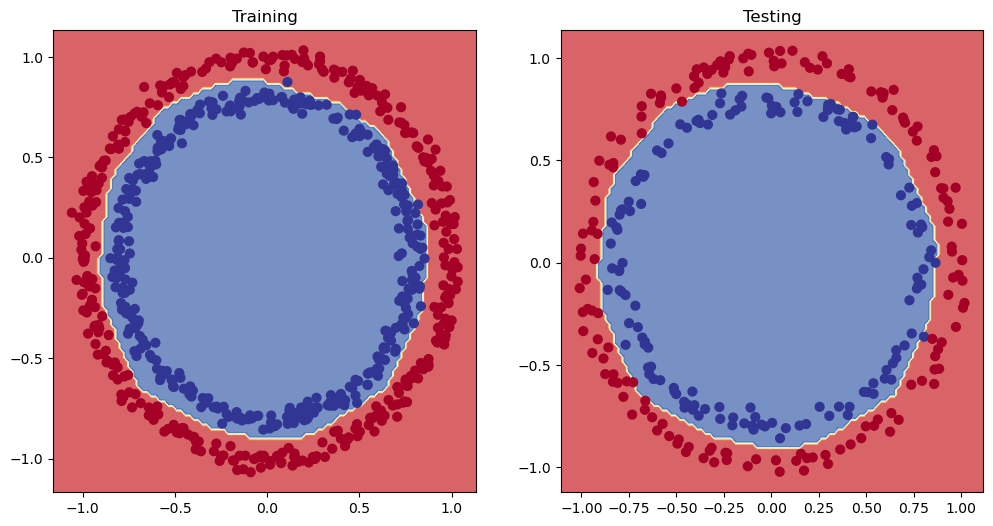

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plotq(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plotq(model,X_test,y_test)